In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading the given data (churn_prediction.csv)
df = pd.read_csv('churn_prediction.csv')
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [4]:
df.shape

(28382, 21)

In [5]:
df.head

<bound method NDFrame.head of        customer_id  vintage  age  gender  dependents     occupation    city  \
0                1     3135   66    Male         0.0  self_employed   187.0   
1                2      310   35    Male         0.0  self_employed     NaN   
2                4     2356   31    Male         0.0       salaried   146.0   
3                5      478   90     NaN         NaN  self_employed  1020.0   
4                6     2531   42    Male         2.0  self_employed  1494.0   
...            ...      ...  ...     ...         ...            ...     ...   
28377        30297     1845   10  Female         0.0        student  1020.0   
28378        30298     4919   34  Female         0.0  self_employed  1046.0   
28379        30299      297   47    Male         0.0       salaried  1096.0   
28380        30300     2585   50    Male         3.0  self_employed  1219.0   
28381        30301     2349   18    Male         0.0        student  1232.0   

       customer_nw_ca

In [6]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [7]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [8]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [9]:
#checking total Null or missing values
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [10]:
df.count()

customer_id                       28382
vintage                           28382
age                               28382
gender                            27857
dependents                        25919
occupation                        28302
city                              27579
customer_nw_category              28382
branch_code                       28382
days_since_last_transaction       25159
current_balance                   28382
previous_month_end_balance        28382
average_monthly_balance_prevQ     28382
average_monthly_balance_prevQ2    28382
current_month_credit              28382
previous_month_credit             28382
current_month_debit               28382
previous_month_debit              28382
current_month_balance             28382
previous_month_balance            28382
churn                             28382
dtype: int64

In [11]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [12]:
#Creating age-groups and replacing them
bin = [1, 20, 60, 90]
group = ['Young', 'MiddleAged', 'Old']
df['age'] = pd.cut(df['age'], bin, labels = group)

In [13]:
df['age'].head(10)

0           Old
1    MiddleAged
2    MiddleAged
3           Old
4    MiddleAged
5    MiddleAged
6           Old
7    MiddleAged
8    MiddleAged
9    MiddleAged
Name: age, dtype: category
Categories (3, object): [Young < MiddleAged < Old]

In [14]:
df['age'].value_counts()

MiddleAged    20248
Old            7052
Young          1078
Name: age, dtype: int64

In [15]:
#Filling missing values of age by grouping
df['customer_nw_category'].groupby(df['age']).value_counts()

age         customer_nw_category
Young       2                         562
            3                         327
            1                         189
MiddleAged  2                       10279
            3                        7642
            1                        2327
Old         2                        3716
            3                        2142
            1                        1194
Name: customer_nw_category, dtype: int64

In [16]:
df['age'].fillna(value = 'MiddleAged', inplace = True)

In [17]:
df['age'].value_counts()

MiddleAged    20252
Old            7052
Young          1078
Name: age, dtype: int64

In [18]:
tab1 = pd.crosstab(df['occupation'], df['customer_nw_category'])
tab1

customer_nw_category,1,2,3
occupation,,,
company,6,17,17
retired,232,1047,745
salaried,800,3270,2634
self_employed,2330,9091,6055
student,338,1099,621


In [19]:
tab2 = pd.crosstab(df['occupation'], df['age'])
tab2

age,Young,MiddleAged,Old
occupation,,,
company,1,14,25
retired,0,77,1947
salaried,15,6020,669
self_employed,87,13019,4370
student,975,1081,2


In [20]:
for i in range(0, len(df)):
    if pd.isnull(df['occupation'][i])==True:
        if df['age'][i]=='Young':
            df['occupation'][i] = 'student'
        elif df['age'][i]=='MiddleAged' or df['age'][i]=='Old':
            df['occupation'][i] = 'self_employed'

In [21]:
df['occupation'].isnull().sum()

0

In [22]:
#Filling missing gender values by grouping according to occupation and customer_nw_category features
df['gender'].groupby(df['age']).value_counts()

age         gender
Young       Male        559
            Female      518
MiddleAged  Male      11863
            Female     8385
Old         Male       4126
            Female     2406
Name: gender, dtype: int64

In [23]:
tab1 = pd.crosstab(df['occupation'], df['age']).groupby(df['gender'])
tab1.head()

age,Young,MiddleAged,Old
occupation,,,
company,1,14,25
retired,0,77,1947
salaried,15,6020,669
self_employed,87,13060,4409
student,975,1081,2


In [24]:
l1 = [1, 2, 3]
l2 = ['company', 'retired', 'salaried', 'self_employed', 'student']

for i in l1:
    for j in l2:
        print('For customer_nw_category', i, 'and occupation:', j)
        print(df['gender'][df['occupation']==j][df['customer_nw_category']==i].mode()[0])

For customer_nw_category 1 and occupation: company
Male
For customer_nw_category 1 and occupation: retired
Male
For customer_nw_category 1 and occupation: salaried
Male
For customer_nw_category 1 and occupation: self_employed
Female
For customer_nw_category 1 and occupation: student
Female
For customer_nw_category 2 and occupation: company
Male
For customer_nw_category 2 and occupation: retired
Male
For customer_nw_category 2 and occupation: salaried
Male
For customer_nw_category 2 and occupation: self_employed
Male
For customer_nw_category 2 and occupation: student
Male
For customer_nw_category 3 and occupation: company
Male
For customer_nw_category 3 and occupation: retired
Male
For customer_nw_category 3 and occupation: salaried
Male
For customer_nw_category 3 and occupation: self_employed
Male
For customer_nw_category 3 and occupation: student
Male


In [25]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                           0
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [26]:
for i in range(0, len(df)):
    if pd.isnull(df['gender'][i])==True:
        if df['customer_nw_category'][i]==1:
            if df['occupation'][i]=='self_employed' or df['occupation'][i]=='student':
                df['gender'][i] = 'Female'
            else:
                df['gender'][i] = 'Male'
        else:
            df['gender'][i] = 'Male'

In [27]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                        2463
occupation                           0
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [28]:
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [29]:
df[['dependents', 'current_month_credit']].loc[df['dependents']>6]

,dependents,current_month_credit
35,7.0,0.19
1326,9.0,1279.11
3741,52.0,286.36
7820,36.0,0.10
8078,7.0,1643.00
9082,50.0,13857.19
9472,8.0,0.17
14016,25.0,13100.21
18865,7.0,0.29
23681,32.0,0.46


In [30]:
df['dependents'].mean()

0.34723561865812724

In [31]:
df['dependents'].fillna(value = 0, inplace = True)
df['dependents'].isnull().sum()

0

In [32]:
df['city'].mean()

796.1095761267632

In [33]:
for i in l1:
    for j in l2:
        print('For customer_nw_category', i, 'and occupation:', j)
        print(df['city'][df['occupation']==j][df['customer_nw_category']==i].mode()[0])

For customer_nw_category 1 and occupation: company
318.0
For customer_nw_category 1 and occupation: retired
1020.0
For customer_nw_category 1 and occupation: salaried
1020.0
For customer_nw_category 1 and occupation: self_employed
1020.0
For customer_nw_category 1 and occupation: student
1020.0
For customer_nw_category 2 and occupation: company
146.0
For customer_nw_category 2 and occupation: retired
1020.0
For customer_nw_category 2 and occupation: salaried
1020.0
For customer_nw_category 2 and occupation: self_employed
1020.0
For customer_nw_category 2 and occupation: student
1020.0
For customer_nw_category 3 and occupation: company
409.0
For customer_nw_category 3 and occupation: retired
1020.0
For customer_nw_category 3 and occupation: salaried
1020.0
For customer_nw_category 3 and occupation: self_employed
1020.0
For customer_nw_category 3 and occupation: student
1020.0


In [34]:
for i in range(0, len(df)):
    if pd.isnull(df['city'][i])==True:
        if df['customer_nw_category'][i]==1:
            if df['occupation'][i]=='company':
                df['city'][i] = 318.0
            else:
                df['city'][i] = 1020.0
        elif df['customer_nw_category'][i]==2:
            if df['occupation'][i]=='company':
                df['city'][i] = 146.0
            else:
                df['city'][i] = 1020.0
        elif df['customer_nw_category'][i]==3:
            if df['occupation'][i]=='company':
                df['city'][i] = 409.0
            else:
                df['city'][i] = 1020.0

In [35]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [36]:
df.corr()

,customer_id,vintage,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.006093,-0.009110,0.000777,0.009618,-0.000286,0.010267,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.006093,1.000000,0.068588,0.041556,-0.167366,-0.380714,-0.088744,0.002986,0.004518,0.003433,0.002244,0.002848,0.028034,0.005406,0.023949,0.001638,0.003448,-0.064637
dependents,-0.009110,0.068588,1.000000,0.003351,0.007917,-0.001704,-0.084620,-0.003838,-0.002181,-0.001786,-0.001967,0.003542,0.025848,0.008225,0.030746,-0.002769,-0.001672,0.029335
city,0.000777,0.041556,0.003351,1.000000,0.009313,-0.055965,-0.003181,-0.006207,-0.004630,-0.006790,-0.008203,0.003810,0.007338,0.001237,0.005475,-0.006345,-0.006314,-0.000790
customer_nw_category,0.009618,-0.167366,0.007917,0.009313,1.000000,0.235059,0.049531,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.000286,-0.380714,-0.001704,-0.055965,0.235059,1.000000,0.038708,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
days_since_last_transaction,0.010267,-0.088744,-0.084620,-0.003181,0.049531,0.038708,1.000000,-0.019990,-0.014400,-0.012709,-0.006384,-0.033131,-0.071657,-0.039165,-0.070192,-0.017837,-0.011738,-0.055830
current_balance,0.006589,0.002986,-0.003838,-0.006207,-0.058314,0.000181,-0.019990,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,0.004518,-0.002181,-0.004630,-0.059854,0.000214,-0.014400,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886
average_monthly_balance_prevQ,0.004485,0.003433,-0.001786,-0.006790,-0.059535,0.001955,-0.012709,0.958307,0.970530,1.000000,0.763495,0.033639,0.085699,0.060579,0.121272,0.976290,0.994038,0.011960


In [37]:
tab2 = pd.crosstab(df['gender'], df['age'][df['customer_nw_category']==1])
tab2

age,Young,MiddleAged,Old
gender,,,
Female,90,1135,576
Male,99,1193,618


In [38]:

tab2 = pd.crosstab(df['gender'], df['age'][df['customer_nw_category']==2])
tab2

age,Young,MiddleAged,Old
gender,,,
Female,275,4251,1277
Male,287,6030,2439


In [39]:
tab2 = pd.crosstab(df['gender'], df['age'][df['customer_nw_category']==3])
tab2

age,Young,MiddleAged,Old
gender,,,
Female,153,3000,679
Male,174,4643,1463


In [40]:
l4 = ['Male', 'Female']
l5 = ['Young', 'MiddleAged', 'Old']
l6 = [1, 2, 3]
l7 = ['company', 'retired', 'salaried', 'self_employed', 'student']

In [41]:
for j in l5:
    for h in l7:
        for t in l4:
            print('Customer category:', j, h, t)
            print(df['days_since_last_transaction'][df['occupation']==h][df['age']==j][df['gender']==t].mean())

Customer category: Young company Male
nan
Customer category: Young company Female
nan
Customer category: Young retired Male
nan
Customer category: Young retired Female
nan
Customer category: Young salaried Male
54.2
Customer category: Young salaried Female
155.0
Customer category: Young self_employed Male
75.85714285714286
Customer category: Young self_employed Female
136.62857142857143
Customer category: Young student Male
111.65294117647059
Customer category: Young student Female
123.284375
Customer category: MiddleAged company Male
117.55555555555556
Customer category: MiddleAged company Female
70.2
Customer category: MiddleAged retired Male
67.9090909090909
Customer category: MiddleAged retired Female
84.0
Customer category: MiddleAged salaried Male
59.615561224489795
Customer category: MiddleAged salaried Female
69.99016393442623
Customer category: MiddleAged self_employed Male
60.9122779682144
Customer category: MiddleAged self_employed Female
79.11063191449466
Customer category:

In [42]:
for j in l5:
    for h in l7:
        print('Customer category:', j, h)
        print(df['days_since_last_transaction'][df['occupation']==h][df['age']==j].mean())

Customer category: Young company
nan
Customer category: Young retired
nan
Customer category: Young salaried
109.18181818181819
Customer category: Young self_employed
106.24285714285715
Customer category: Young student
117.29242424242425
Customer category: MiddleAged company
100.64285714285714
Customer category: MiddleAged retired
73.58823529411765
Customer category: MiddleAged salaried
62.52121212121212
Customer category: MiddleAged self_employed
69.17130456982385
Customer category: MiddleAged student
75.48491155046827
Customer category: Old company
52.0
Customer category: Old retired
67.90914385556202
Customer category: Old salaried
65.13136288998358
Customer category: Old self_employed
74.489689376142
Customer category: Old student
67.5


In [43]:
for h in l7:
    for t in l4:
        print('Customer category:', h, t)
        print(df['days_since_last_transaction'][df['occupation']==h][df['gender']==t].median())

Customer category: company Male
37.0
Customer category: company Female
53.5
Customer category: retired Male
31.0
Customer category: retired Female
32.0
Customer category: salaried Male
24.0
Customer category: salaried Female
30.0
Customer category: self_employed Male
27.0
Customer category: self_employed Female
39.0
Customer category: student Male
49.0
Customer category: student Female
59.0


In [44]:
for j in l5:
    for t in l4:
        print('Customer category:', j, t)
        print(df['days_since_last_transaction'][df['age']==j][df['gender']==t].mean())

Customer category: Young Male
107.6
Customer category: Young Female
125.10526315789474
Customer category: MiddleAged Male
61.0344669117647
Customer category: MiddleAged Female
77.2060062508493
Customer category: Old Male
69.77291037260825
Customer category: Old Female
75.0666062528319


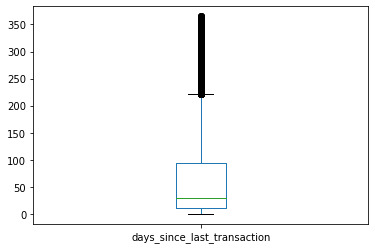

In [45]:
df['days_since_last_transaction'].plot.box()

In [46]:
li1 = [37.0, 31.0, 24.0, 27.0, 49.0]
li2 = [53.5, 32.0, 30.0, 39.0, 59.0]
for i in range(0, len(df)):
    if pd.isnull(df['days_since_last_transaction'][i])==True:
        if df['gender'][i]=='Male':
            df['days_since_last_transaction'][i] = li1[l7.index(df['occupation'][i])]
        elif df['gender'][i]=='Female':
            df['days_since_last_transaction'][i] = li2[l7.index(df['occupation'][i])]

In [47]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [48]:
df.dtypes

customer_id                          int64
vintage                              int64
age                               category
gender                              object
dependents                         float64
occupation                          object
city                               float64
customer_nw_category                 int64
branch_code                          int64
days_since_last_transaction        float64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                                int64
dtype: object

In [49]:
df['age'].value_counts()

MiddleAged    20252
Old            7052
Young          1078
Name: age, dtype: int64

In [50]:
newdf = pd.get_dummies(df)

In [51]:
newdf.head()

,customer_id,vintage,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,age_Young,age_MiddleAged,age_Old,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,0.0,187.0,2,755,224.0,1458.71,1458.71,1458.71,...,0,0,1,0,1,0,0,0,1,0
1,2,310,0.0,1020.0,2,3214,60.0,5390.37,8704.66,7799.26,...,0,1,0,0,1,0,0,0,1,0
2,4,2356,0.0,146.0,2,41,24.0,3913.16,5815.29,4910.17,...,0,1,0,0,1,0,0,1,0,0
3,5,478,0.0,1020.0,2,582,147.0,2291.91,2291.91,2084.54,...,0,0,1,0,1,0,0,0,1,0
4,6,2531,2.0,1494.0,3,388,58.0,927.72,1401.72,1643.31,...,0,1,0,0,1,0,0,0,1,0


In [52]:
newdf.shape

(28382, 28)

In [53]:
newdf.drop(['customer_id'], axis = 1, inplace = True)

In [54]:
newdf.shape

(28382, 27)

In [55]:
newdf.dtypes

vintage                             int64
dependents                        float64
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
age_Young                           uint8
age_MiddleAged                      uint8
age_Old                             uint8
gender_Female                       uint8
gender_Male                         uint8
occupation_company                  uint8
occupation_retired                

In [56]:
X = newdf.drop(['churn'], axis = 1)
y = newdf['churn']
X.shape, y.shape

((28382, 26), (28382,))

In [57]:
from sklearn.model_selection import train_test_split as tts

In [58]:
train_X, test_X, train_y, test_y = tts(X, y, random_state = 52, stratify = y)

In [59]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT

In [60]:
model1 = LR()
model1.fit(train_X,train_y)
pred1 = model1.predict(test_X)
pred1[:10], model1.score(test_X, test_y)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), 0.8246899661781285)

## KNN

#### KNN Algo - Auto

In [61]:
err = []
for i in range(1, 50):
    temp = KNN(n_neighbors = i, weights = 'distance', algorithm = 'auto')
    temp.fit(train_X, train_y)
    err.append(temp.score(test_X, test_y))

In [62]:
k = range(1, 50)

(0.85, 0.9)

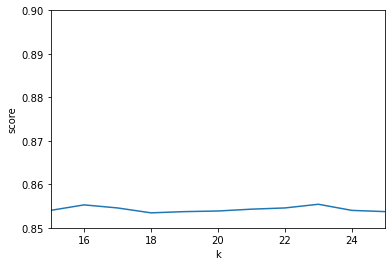

In [63]:
plt.plot(k, err)
plt.xlabel('k')
plt.ylabel('score')
plt.xlim(15, 25)
plt.ylim(0.85, 0.90)

#### KNN Algo - Ball Tree

In [64]:
err = []
for i in range(1, 50):
    temp = KNN(n_neighbors = i, weights = 'distance', algorithm = 'ball_tree')
    temp.fit(train_X, train_y)
    err.append(temp.score(test_X, test_y))

(0.85, 0.9)

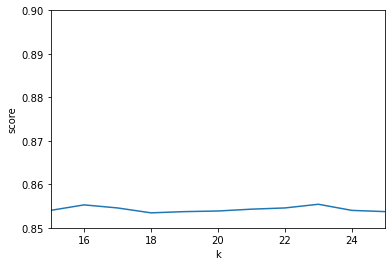

In [65]:
plt.plot(k, err)
plt.xlabel('k')
plt.ylabel('score')
plt.xlim(15, 25)
plt.ylim(0.85, 0.90)

#### KNN algo - KD Tree

In [66]:
err = []
for i in range(1, 50):
    temp = KNN(n_neighbors = i, weights = 'distance', algorithm = 'kd_tree')
    temp.fit(train_X, train_y)
    err.append(temp.score(test_X, test_y))

(0.85, 0.9)

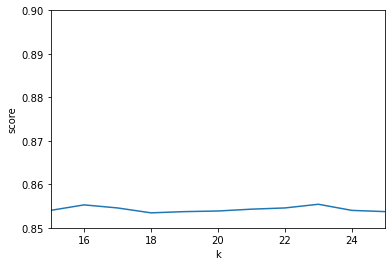

In [67]:
plt.plot(k, err)
plt.xlabel('k')
plt.ylabel('score')
plt.xlim(15, 25)
plt.ylim(0.85, 0.90)

#### KNN algo - Brute

In [68]:
err = []
for i in range(1, 50):
    temp = KNN(n_neighbors = i, weights = 'distance', algorithm = 'brute')
    temp.fit(train_X, train_y)
    err.append(temp.score(test_X, test_y))

(0.85, 0.9)

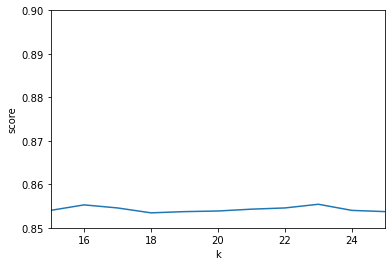

In [69]:
plt.plot(k, err)
plt.xlabel('k')
plt.ylabel('score')
plt.xlim(15, 25)
plt.ylim(0.85, 0.90)

In [70]:
model2 = KNN(n_neighbors = 23, weights = 'distance', algorithm = 'ball_tree')
model2.fit(train_X, train_y)
pred2 = model2.predict(test_X)
pred2[:10], model2.score(test_X, test_y)

(array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64), 0.8554114994363021)

# DECISION TREE

In [71]:
list1 = ['gini', 'entropy']
list2 = ['best', 'random']
K = range(1, 30)

In [72]:
#gini impurity, best split
for i in range(1, 30):
    temp = DT(max_depth = i, criterion = list1[0], splitter = list2[0])
    temp.fit(train_X, train_y)
    err.append(temp.score(test_X, test_y))

ValueError: x and y must have same first dimension, but have shapes (29,) and (78,)

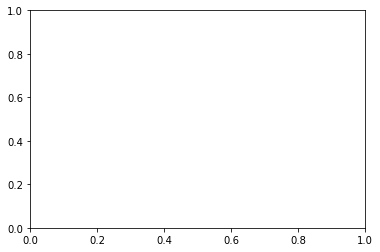

In [73]:
plt.plot(K, err)
plt.xlabel('k')
plt.ylabel('score')
plt.xlim(5, 10)
plt.ylim(0.85, 0.86)

In [74]:
#gini impurity, random best split
err = []
for i in range(1, 30):
    temp = DT(max_depth = i, criterion = list1[0], splitter = list2[1])
    temp.fit(train_X, train_y)
    err.append(temp.score(test_X, test_y))

Text(0, 0.5, 'score')

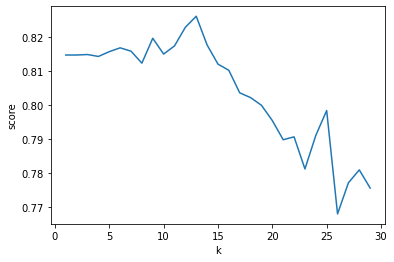

In [75]:
plt.plot(K, err)
plt.xlabel('k')
plt.ylabel('score')

In [76]:
#entropy, best split
err = []
for i in range(1, 30):
    temp = DT(max_depth = i, criterion = list1[1], splitter = list2[0])
    temp.fit(train_X, train_y)
    err.append(temp.score(test_X, test_y))

(0.85, 0.86)

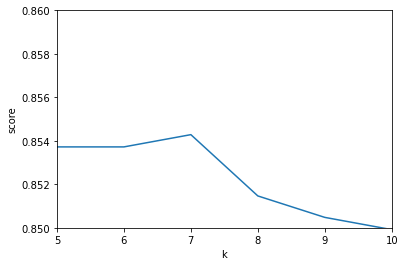

In [77]:
plt.plot(K, err)
plt.xlabel('k')
plt.ylabel('score')
plt.xlim(5, 10)
plt.ylim(0.85, 0.86)

In [78]:
#entropy, random best split
err = []
for i in range(1, 30):
    temp = DT(max_depth = i, criterion = list1[1], splitter = list2[1])
    temp.fit(train_X, train_y)
    err.append(temp.score(test_X, test_y))

Text(0, 0.5, 'score')

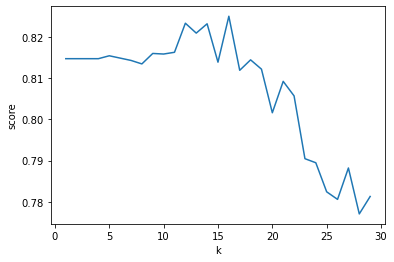

In [79]:
plt.plot(K, err)
plt.xlabel('k')
plt.ylabel('score')

In [80]:
model3 = DT(max_depth = 7, criterion = 'gini', splitter = 'best')
model3.fit(train_X, train_y)
pred3 = model3.predict(test_X)
pred3[:10], model3.score(test_X, test_y)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), 0.8562570462232244)

In [81]:
test = pd.DataFrame(columns=['M1', 'M2', 'M3', 'Actual'])
test['M1'] = pred1
test['M2'] = pred2
test['M3'] = pred3
test['Actual'] = np.array(test_y)

In [82]:
test['M1'].value_counts()

0    6933
1     163
Name: M1, dtype: int64

In [83]:
test['M2'].value_counts()

0    6415
1     681
Name: M2, dtype: int64

In [84]:
test['M3'].value_counts()

0    6233
1     863
Name: M3, dtype: int64

In [85]:
test['Actual'].value_counts()

0    5781
1    1315
Name: Actual, dtype: int64

In [86]:
m1_score= model1.score(test_X, test_y)
m2_score= model2.score(test_X, test_y)
m3_score= model3.score(test_X, test_y)
m1_score, m2_score, m3_score

(0.8246899661781285, 0.8554114994363021, 0.8562570462232244)

In [87]:
#Max Voting
from statistics import mode
final_pred = np.array([])
for i in range(0, len(test_X)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
max_voting_accuracy = accuracy_score(test_y, final_pred)

In [90]:
#Rank average ensemble
i = [1,2,3]
modelscores = [m1_score,m2_score,m3_score]

rank = pd.DataFrame({'score': modelscores}, index = i)
rank

,score
1,0.824690
2,0.855411
3,0.856257


In [91]:
sorted_rank = rank.sort_values('score')
sorted_rank

,score
1,0.824690
2,0.855411
3,0.856257


In [92]:
sorted_rank['rank'] = [i for i in range(1, 4)]
sorted_rank

,score,rank
1,0.824690,1
2,0.855411,2
3,0.856257,3


In [93]:
sorted_rank['weight'] = sorted_rank['rank']/sorted_rank['rank'].sum()
sorted_rank

,score,rank,weight
1,0.824690,1,0.166667
2,0.855411,2,0.333333
3,0.856257,3,0.500000


In [94]:
rankedpred1 = pred1*float(sorted_rank.loc[[1],['weight']].values)
rankedpred2 = pred2*float(sorted_rank.loc[[2],['weight']].values)
rankedpred3 = pred3*float(sorted_rank.loc[[3],['weight']].values)
ranked_prediction = rankedpred1 + rankedpred2 + rankedpred3
ranked_prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [95]:
for i in range(0, len(ranked_prediction)):
    if ranked_prediction[i]>0.40:
        ranked_prediction[i] = 1
    else:
        ranked_prediction[i] = 0

In [96]:
rank_average_accuracy = accuracy_score(ranked_prediction, test_y)

In [97]:
print('> Max Voting accuracy:', max_voting_accuracy, '\n> Rank Average accuracy:', rank_average_accuracy)

> Max Voting accuracy: 0.8555524239007892 
> Rank Average accuracy: 0.858793686583991
